In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynascale.utils.lds import plot
from dynascale.challenges.lds import LDSChallenge
import numpy as np
from functools import partial

(<Figure size 640x480 with 1 Axes>, <Axes: >)

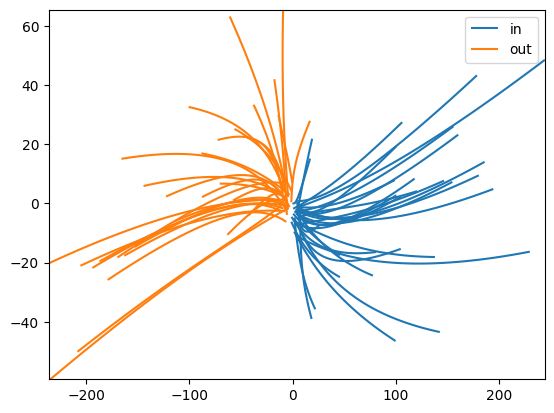

In [4]:
challenge = LDSChallenge(15, 100)
x0 = challenge.make_init_conds(5000)
y0 = challenge.make_init_conds(5000, in_dist=False)
x = challenge.make_data(x0, timesteps=50)
y = challenge.make_data(y0, timesteps=50)
plot([x, y], target_dim=2, labels=["in", "out"])

In [185]:
# np.linalg.eig(challenge.A)[0].max().real
x.max()

24087.351921443693